In [13]:
import glob
import time
from sokoban import Warehouse
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Import the mySokobanSolver.py file to import all functions
from mySokobanSolver import *

# elemenet seq analysis

In [15]:
def create_df(macro=False):
#create_df_results
        result_folder="analyses_results"
        txt_files = glob.glob(os.path.join(result_folder, "*.txt"))
        
        if macro:
                txt_files = [file for file in txt_files if file.endswith("_macro.txt")]
                
        else:
                txt_files = [file for file in txt_files if not file.endswith("_macro.txt")]

        dfs = []

        for file_path in txt_files:
                if os.path.getsize(file_path) == 0:
                        print(f"Skipping empty file: {file}")
                        continue
                with open(file_path, "r") as file:
                        algorithm = file_path.split('\\')[1].split("_")[0]
                        df = pd.read_csv(file, sep=",", header=0)
                        df["search"] = algorithm
                        dfs.append(df)
                final_df = pd.concat(dfs, ignore_index=True)
        return final_df

In [16]:
final_df = create_df()
final_df.shape

(185, 5)

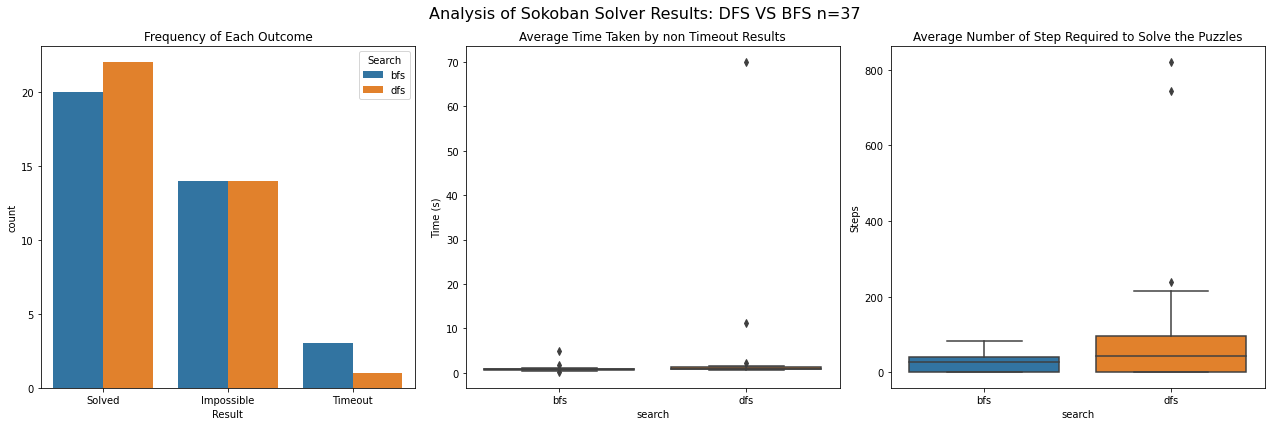

In [17]:
selected_df = final_df[final_df['search'].isin(['dfs', 'bfs'])]

fig, axes = plt.subplots(1,3, figsize=(18,6))

plt.suptitle('Analysis of Sokoban Solver Results: DFS VS BFS n=37', fontsize=16)

sns.countplot(data=selected_df, x='Result', hue='search',ax=axes[0])
axes[0].set_title("Frequency of Each Outcome")
axes[0].legend(title='Search', loc='upper right')
sns.boxplot(data=selected_df[selected_df["Result"]!="Timeout"], x="search", y="TimeTaken", ax=axes[1])
axes[1].set_title("Average Time Taken by non Timeout Results")
axes[1].set_ylabel("Time (s)")

sns.boxplot(data=selected_df[selected_df["Result"]!="Timeout"], x="search", y="Cost", ax=axes[2])
axes[2].set_title("Average Number of Step Required to Solve the Puzzles")
axes[2].set_ylabel("Steps")
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [18]:
grouped = selected_df.groupby('Warehouse')

results = []

for warehouse, group in grouped:
    if set(['bfs', 'dfs']).issubset(set(group['search'])):
        bfs_row = group[group['search'] == 'bfs']
        dfs_row = group[group['search'] == 'dfs']

        # Ensure we have exactly one row for bfs and dfs
        if not bfs_row.empty and not dfs_row.empty:
            bfs_time = bfs_row['TimeTaken'].values[0]
            dfs_time = dfs_row['TimeTaken'].values[0]

            bfs_cost = bfs_row['Cost'].values[0]
            dfs_cost = dfs_row['Cost'].values[0]

            # Calculate time and steps differences
            time_diffs = bfs_time - dfs_time  # Time taken for bfs - dfs
            steps_diffs = bfs_cost - dfs_cost  # Cost for bfs - dfs

            results.append({
                'Warehouse': warehouse,
                'BFS_Time': bfs_time,
                'DFS_Time': dfs_time,
                'TimeDiff': time_diffs,
                'BFS_Cost': bfs_cost,
                'DFS_Cost': dfs_cost,
                'StepsDiff': steps_diffs,
                'BFS_Result': bfs_row['Result'].values[0],
                'DFS_Result': dfs_row['Result'].values[0],
            })

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

results_df 

,Warehouse,BFS_Time,DFS_Time,TimeDiff,BFS_Cost,DFS_Cost,StepsDiff,BFS_Result,DFS_Result
0,1,0.684278,1.000008,-0.315731,33,37,-4,Solved,Solved
1,3,0.422961,0.752009,-0.329048,41,59,-18,Solved,Solved
2,5,0.557648,0.907244,-0.349597,0,0,0,Impossible,Impossible
3,7,180.415773,181.595502,-1.179729,0,0,0,Timeout,Timeout
4,9,0.740781,1.084867,-0.344086,30,30,0,Solved,Solved
5,11,0.848685,0.639503,0.209182,78,198,-120,Solved,Solved
6,13,1.731291,1.320805,0.410486,52,239,-187,Solved,Solved
7,15,0.902735,0.934453,-0.031718,37,49,-12,Solved,Solved
8,17,0.892845,1.273063,-0.380218,25,36,-11,Solved,Solved
9,19,0.648943,0.922021,-0.273078,41,59,-18,Solved,Solved


In [19]:
results_df[results_df["BFS_Result"]== results_df["DFS_Result"]]['StepsDiff'].shape

(35,)

In [28]:
def summary_figure(df):
    fig, axes = plt.subplots(1,3, figsize=(18,6))
    plt.suptitle('Analysis of Sokoban Solver Results n=37', fontsize=16)

    sns.countplot(data=df, x='Result', hue='search',ax=axes[0])
    axes[0].set_title("Frequency of Each Outcome")
    axes[0].legend(title='Search', loc='upper right')
    sns.boxplot(data=df[df["Result"]!="Timeout"], x="search", y="TimeTaken", ax=axes[1])
    axes[1].set_title("Average Time Taken by non Timeout Results")
    axes[1].set_ylabel("Time (s)")

    sns.boxplot(data=df[df["Result"]!="Timeout"], x="search", y="Cost", ax=axes[2])
    axes[2].set_title("Average Number of Step Required to Solve the Puzzles")
    axes[2].set_ylabel("Steps")
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

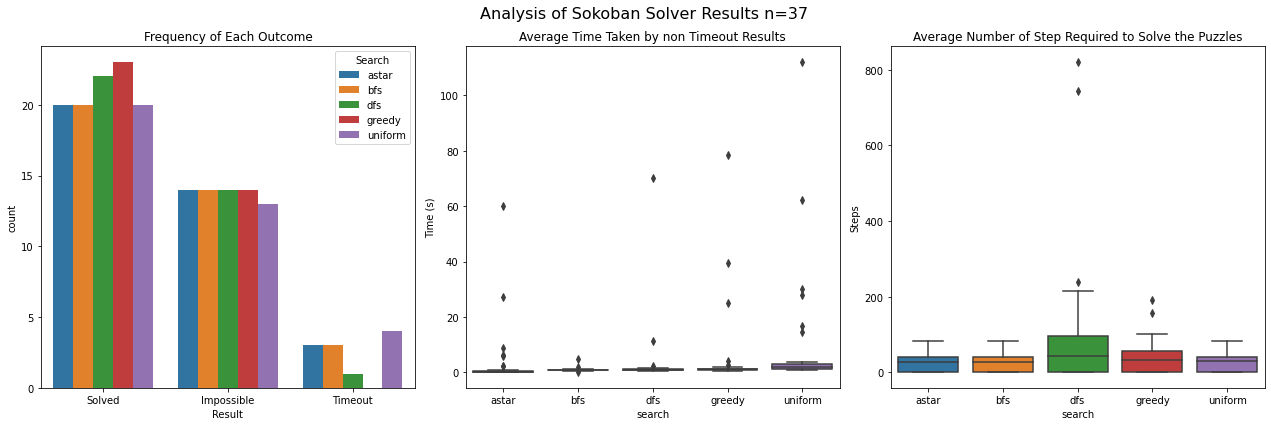

In [21]:
summary_figure(final_df)

In [22]:
print(final_df.drop('Warehouse', axis=1).groupby("search").sum())
print(final_df.drop('Warehouse', axis=1).groupby("search").mean())

           TimeTaken  Cost
search                    
astar     659.946712   867
bfs       573.376368   867
dfs       295.611906  3428
greedy    180.767706  1442
uniform  1033.851657   867
         TimeTaken       Cost
search                       
astar    17.836398  23.432432
bfs      15.496659  23.432432
dfs       7.989511  92.648649
greedy    4.885614  38.972973
uniform  27.941937  23.432432


In [23]:
def most_efficient_df(df):
    # create a table with, for each warehouse, the most efficient
    grouped = final_df.groupby(['Warehouse'])

    results = []

    for search , data in grouped:
        
        most_efficient_time = data.TimeTaken.min()
        most_efficient_algorithm = data[data["TimeTaken"]== most_efficient_time]
        
        results.append(results.append(most_efficient_algorithm))

    # Create a DataFrame with the results
    most_efficient_df = pd.concat(results).reset_index(drop=True)

    return most_efficient_df

In [24]:
def most_efficient_figure(df):
    '''
    Takes a df created by the most_efficeint_df function
    '''
    sns.set_style("dark")
    sns.countplot(data=df, x='search')
    plt.title("Efficiency Analysis")
    plt.ylabel("Most Efficient Count")
    plt.xlabel("Search Algorithm")

In [25]:
most_efficient_df_seq = most_efficient_df(final_df)

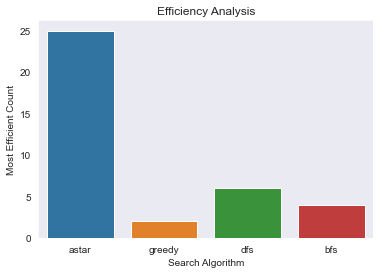

In [26]:
most_efficient_figure(most_efficient_df_seq)

# Macro Analyses

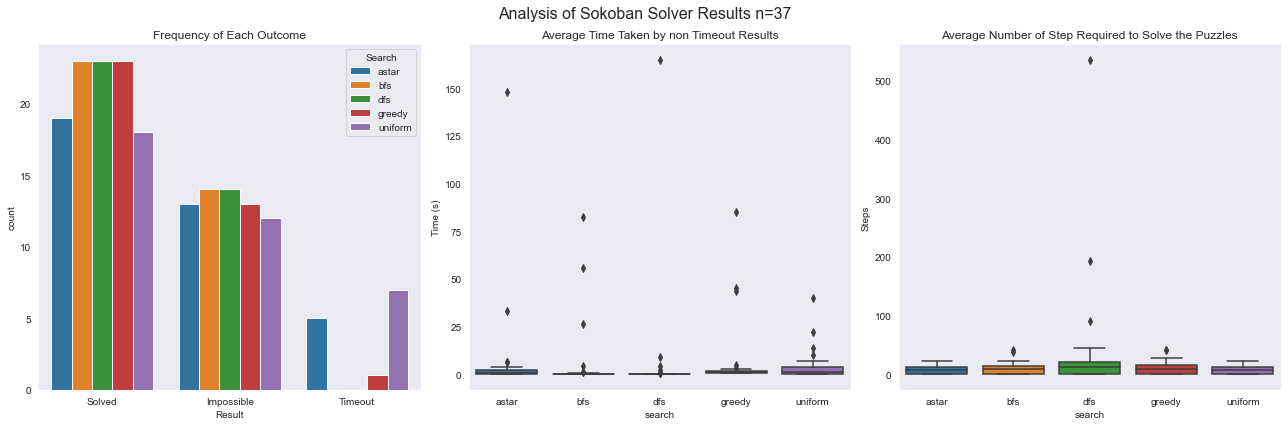

In [29]:
macro_df = create_df(macro=True)
summary_figure(macro_df)